In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

# Loading the data

In [2]:
df = pd.Series()
df['raw'] = pd.read_csv('./data/movie_metadata.csv')
df['raw'].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Data cleaning

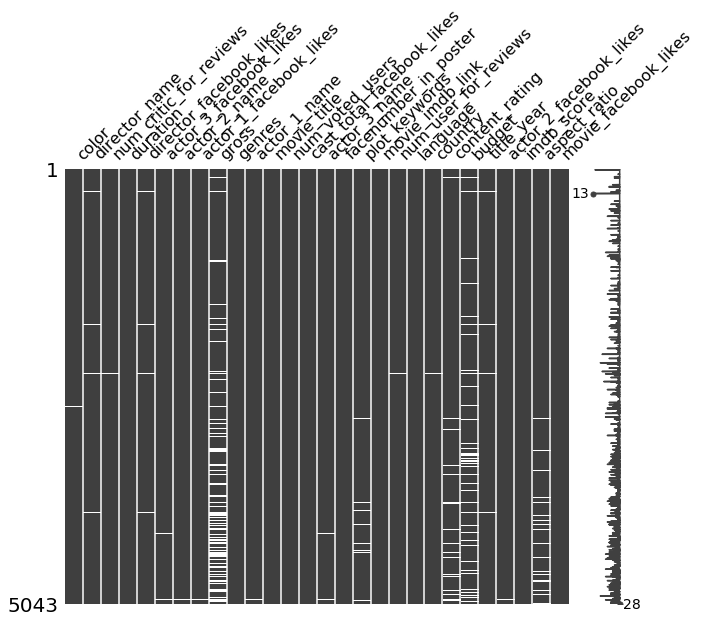

In [3]:
msno.matrix(df['raw'],figsize=(10,8))

In [4]:
NA = df['raw'].shape[0] - df['raw'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['raw'].shape[0]))

Amount of lines containing N/A:		1287
Percent of lines containing N/A:	25.52%


Our experience is that our computers are not powerfull enough to handle categorial data as one-hot notation. We realise that this is not ideal, but we assume we will be able to make a proof of concept using only the numeric data.

In [5]:
df['numeric'] = df['raw']._get_numeric_data()

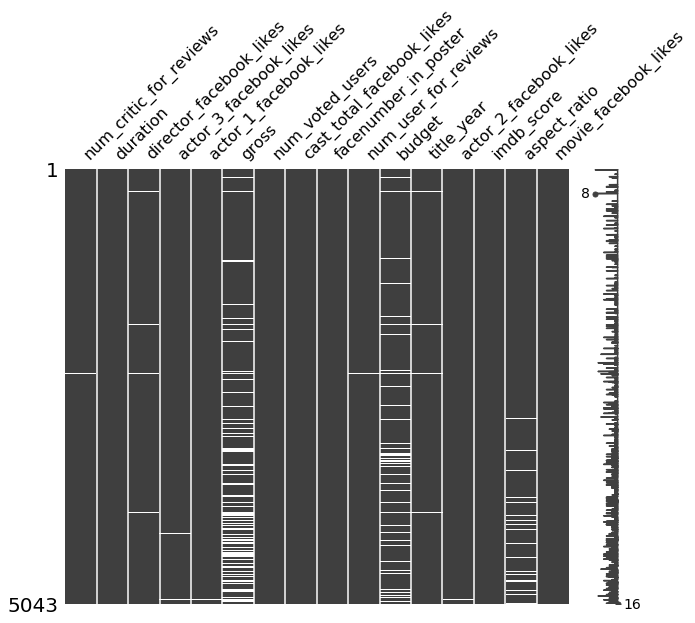

In [6]:
msno.matrix(df['numeric'],figsize=(10,8))

In [7]:
NA = df['numeric'].shape[0] - df['numeric'].dropna().shape[0]
print('Amount of lines containing N/A:\t\t{}'.format(NA))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*NA/df['numeric'].shape[0]))

Amount of lines containing N/A:		1242
Percent of lines containing N/A:	24.63%


Dropping N/A's will give remove almost 25% of the dataset. We don't deem this a big problem, as there will still be almost 4000 lines left

In [8]:
df['numeric'] = df['numeric'].dropna()

# Data exploration and selection

In [9]:
df['numeric'].columns.tolist()

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

Because the dataset is webscraped, we will investigate the data we deem most likely to contain errors.
The attributes we wil look at is facebook likes, imdb votes/review counts and the columns containing budget and gross.

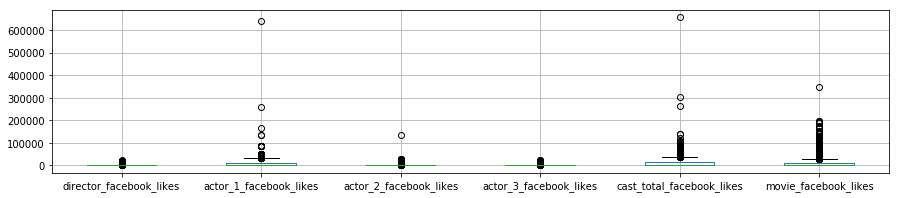

In [10]:
columns = ['director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes',
          'cast_total_facebook_likes','movie_facebook_likes']
df['numeric'][columns].boxplot(figsize=(15,3));
plt.show()

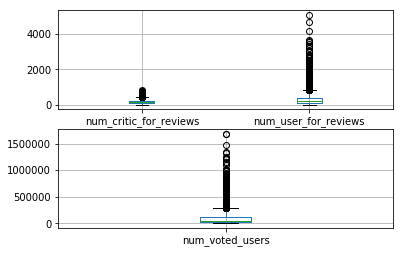

In [11]:
columns = ['num_critic_for_reviews','num_user_for_reviews']
plt.subplot(211)
df['numeric'][columns].boxplot(figsize=(15,3));
columns = 'num_voted_users'
plt.subplot(212)
pd.DataFrame(df['numeric'][columns]).boxplot(figsize=(15,3));
plt.show()

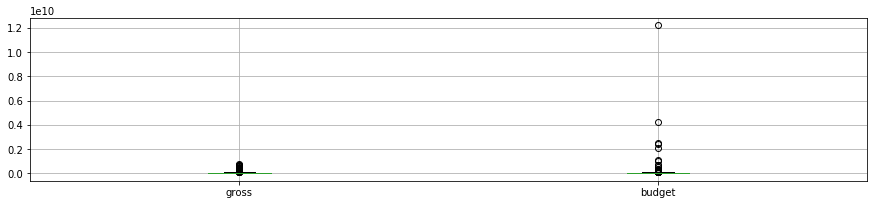

In [12]:
columns = ['gross','budget']
df['numeric'][columns].boxplot(figsize=(15,3));
plt.show()

Gross seems unreas

In [13]:
df['numeric']['budget'].idxmax()

2988

In [14]:
df['raw'].iloc[2988]

color                                                                    Color
director_name                                                     Joon-ho Bong
num_critic_for_reviews                                                     363
duration                                                                   110
director_facebook_likes                                                    584
actor_3_facebook_likes                                                      74
actor_2_name                                                      Kang-ho Song
actor_1_facebook_likes                                                     629
gross                                                              2.20141e+06
genres                                              Comedy|Drama|Horror|Sci-Fi
actor_1_name                                                         Doona Bae
movie_title                                                          The Host 
num_voted_users                                     

In [15]:
sort = df['raw'].sort_values(['budget'], ascending=False)
sort[['country','gross','budget']].head(10)

,country,gross,budget
2988,South Korea,2201412.0,1.221550e+10
3859,South Korea,211667.0,4.200000e+09
3005,Hungary,195888.0,2.500000e+09
2323,Japan,2298191.0,2.400000e+09
2334,Japan,410388.0,2.127520e+09
3423,Japan,439162.0,1.100000e+09
4542,Japan,10037390.0,1.000000e+09
3075,India,3275443.0,7.000000e+08
3851,Spain,1687311.0,7.000000e+08
3273,India,1602466.0,6.000000e+08


The movies with the highest budget, all seem to come from countries with a significantly lower valuta value than the us dollar. For instance 1 dollar would buy you 111 japanese yen. Based on this, and the fact that all these movies would have lost money if this was not the case, we assume the budget is given in the local valuta, and gross is given in dollar. Therefore we choose to drop all movies which does not reside in the us.

In [16]:
obj = df['raw'][df['raw']['country'].isin({'USA'})]
obj = obj._get_numeric_data()
obj = obj.dropna()

print('difference is:', df['numeric'].shape[0]-obj.shape[0],'lines')

difference is: 796 lines


In [19]:
######################################
#moved here to make the cell rerunable
df['numeric'] = obj
######################################

# the range of the classes (0-4,4-6,6-8,8-10)
bins = [0,4,6,8,10]

# Labels for the above classes
labels=['Bad','Average','Good','Very good']

#encode
df['numeric']['imdb_score'] = pd.cut(df['numeric']['imdb_score'], bins=bins, labels=labels, include_lowest=True)

In [20]:
df['numeric'].head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,Good,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,Good,2.35,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,Very good,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,Good,2.35,24000
6,392.0,156.0,0.0,4000.0,24000.0,336530303.0,383056,46055,0.0,1902.0,258000000.0,2007.0,11000.0,Good,2.35,0


# Save the result

In [ ]:
df['numeric'].to_csv('./Data/clean.csv')